Knock Airport Weather

Data link

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [98]:
# Python libraries
import pandas as pd
import datetime
import numpy as np

In [99]:
# Loading data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Change the 'date' column to 'datetime' type.

In [100]:
pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')

df['date'] = pd.to_datetime(df['date'])

df['date']

C:\Users\phumi\AppData\Local\Temp\ipykernel_19476\657735353.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
C:\Users\phumi\AppData\Local\Temp\ipykernel_19476\657735353.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: date, Length: 247674, dtype: datetime64[ns]

Create DatetimeIndex

In [101]:
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


Plotting

In [102]:
import seaborn as sns

<Axes: xlabel='date', ylabel='temp'>

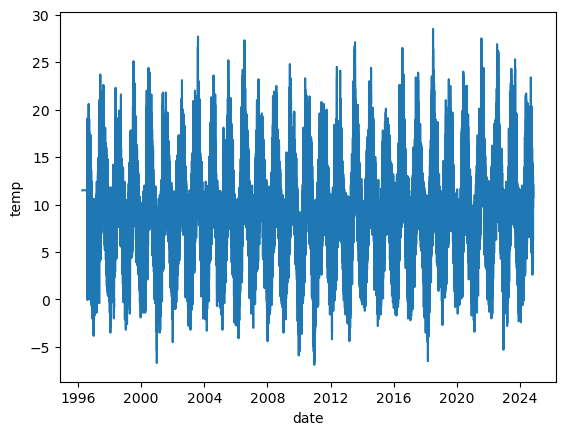

In [103]:
# Temperature over the years
sns.lineplot(data=df, x='date', y='temp')

Mean Temperature

In [104]:
# Calculate the mean temp

dateFrom = "1996-04-10 14:00:00"
dateTo = "2024-11-01 00:00:00"
df.loc[dateFrom:dateTo]['temp'].mean()

8.766820094156028

Calculate Daily Mean Temperature

In [105]:
# Daily mean temperature
daily_av =  df["temp"].resample("D").mean()

# Create 'daily_av' column
df['daily_av'] = df["temp"].resample("D").mean()
print(daily_av)

date
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2024-10-28    11.487500
2024-10-29    10.445833
2024-10-30    10.983333
2024-10-31    10.554167
2024-11-01     9.700000
Freq: D, Name: temp, Length: 10433, dtype: float64


<Axes: xlabel='date', ylabel='daily_av'>

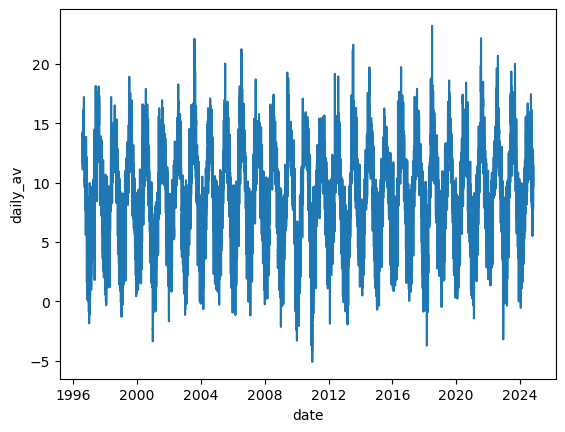

In [106]:
# Plot
sns.lineplot(data=df, x='date', y='daily_av')


Calculate Monthly Mean Temperature

In [107]:
# Monthly mean temperature

monthly_av = df["temp"].resample("ME").mean()
df['monthly_av'] = df["temp"].resample("ME").mean()

print(monthly_av)

date
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
                ...    
2024-07-31    12.994489
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     9.966263
2024-11-30     9.700000
Freq: ME, Name: temp, Length: 344, dtype: float64


<Axes: xlabel='date', ylabel='monthly_av'>

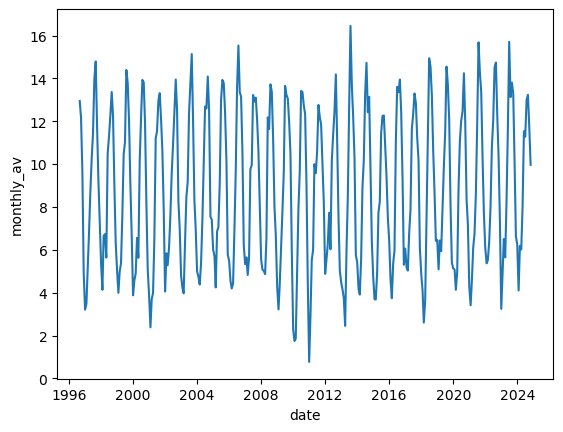

In [108]:
# Plot
sns.lineplot(data=df, x='date', y='monthly_av')

Missing Values

In [115]:
#Check for missing value
cleandf = df['ind']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247674 entries, 1996-04-10 14:00:00 to 2024-11-01 00:00:00
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ind         247674 non-null  int64  
 1   rain        247674 non-null  object 
 2   ind.1       247674 non-null  int64  
 3   temp        247674 non-null  float64
 4   ind.2       247674 non-null  int64  
 5   wetb        247674 non-null  float64
 6   dewpt       247674 non-null  float64
 7   vappr       247674 non-null  float64
 8   rhum        247674 non-null  int64  
 9   msl         247674 non-null  object 
 10  ind.3       247674 non-null  int64  
 11  wdsp        247674 non-null  object 
 12  ind.4       247674 non-null  int64  
 13  wddir       247674 non-null  object 
 14  ww          247674 non-null  object 
 15  w           247674 non-null  object 
 16  sun         247674 non-null  float64
 17  vis         247674 non-null  object 
 18  clht      

Windspeed Plot